In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

df_gangnam= pd.read_csv(r'C:\Users\sebiy\cp1\dataset\preprocessed data\by_counties\df_gangnam.csv')

In [8]:
#강남구

df_gangnam['대여일자'] = df_gangnam['대여일자'].replace('"','')
df_gangnam = df_gangnam.set_index('대여일자')

In [4]:
final_diff = df_gangnam.diff().dropna() #1차 차분

train = final_diff.iloc[:-30,:]  #train test split 한 달치 데이터가 테스트 데이터
test = final_diff.iloc[-30:,:]
print(train.shape)
print(test.shape)

(150, 15)
(30, 15)


In [9]:
# VAR 모델은 예측할 변수의 과거 값뿐만 아니라 예측할 변수와 의존성이 있는 변수 들까지 고려하여 예측함

model_gangnam = VAR(train)

maxlags_gangnam = 6 #가장 낮은 AIC score 를 주는 p 값
lagged_values_gangnam = train.values[-6:] #9일 동안의 훈련

print(model_gangnam.select_order(maxlags_gangnam))

result_gangnam = model_gangnam.fit(maxlags=maxlags_gangnam, ic='aic')
print(result_gangnam.summary())

print(result_gangnam.forecast(y= lagged_values_gangnam, steps=30)) #향후 30일간을 예측

c:\Users\sebiy\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 6, BIC -> 0, FPE -> 6, HQIC ->  1>
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 08, Sep, 2022
Time:                     19:06:48
--------------------------------------------------------------------
No. of Equations:         15.0000    BIC:                    126.031
Nobs:                     144.000    HQIC:                   109.319
Log likelihood:          -8747.26    FPE:                9.48601e+43
AIC:                      97.8799    Det(Omega_mle):     6.11650e+40
--------------------------------------------------------------------
Results for equation 개포동
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           6.025167        21.092794            0.286           0.775
L1.개포동         -1.045519         0.22

In [10]:
model_gangnam = VAR(train)

results_aic = []
for p in range(1,7):
  results = model_gangnam.fit(p)
  results_aic.append(results.aic)

c:\Users\sebiy\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


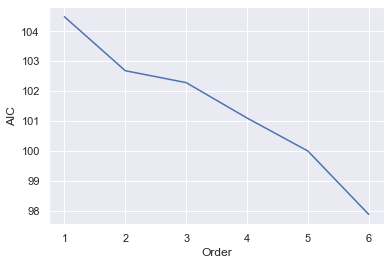

In [10]:
#가장 낮은 p 값 찾기 

sns.set()
plt.plot(list(np.arange(1,7,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [11]:
#30일간의 예측값 
#태블로 시각화 예정
#예측결과는 보고서에만 첨부

forecast_gangnam = pd.DataFrame(result_gangnam.forecast(y= lagged_values_gangnam, steps=30), index = test.index, columns=['개포동', '논현동', '대치동', '도곡동', '삼성동', '세곡동', '수서동', '신사동', '압구정동', '양재동','역삼동', '율현동', '일원동', '자곡동', '청담동'])

forecast_gangnam.head()

,개포동,논현동,대치동,도곡동,삼성동,세곡동,수서동,신사동,압구정동,양재동,역삼동,율현동,일원동,자곡동,청담동
대여일자,,,,,,,,,,,,,,,
"""2022-06-01""",1105.898704,104.807777,-29.848017,96.311242,789.314362,6.102112,89.060636,78.910181,-95.612268,3.936339,289.574798,-14.269203,-3.842495,57.476608,16.225854
"""2022-06-02""",-244.596799,-88.537437,202.622286,57.792975,-20.433454,27.858881,-9.357130,92.475896,269.010186,27.646498,-76.813795,37.552018,99.184880,37.155779,113.927265
"""2022-06-03""",-514.000169,-140.276848,-141.261039,-260.397333,-654.927739,-15.146252,-108.037643,-109.847627,-36.548302,-20.301622,-387.428765,-3.008283,-56.030407,-67.205691,-143.220191
"""2022-06-04""",-232.879737,63.017732,-66.830829,5.867098,-432.108364,-15.622196,-26.560124,20.648860,20.146843,-50.318765,-2.143280,-25.106436,7.617584,-42.731611,3.348575
"""2022-06-05""",-551.030697,-36.865254,-44.391219,17.682968,146.336816,-1.269872,-15.166654,-77.994478,-191.623686,-14.284668,9.651989,-22.862936,-59.635682,-4.219198,-29.408901


In [56]:
#n 일 뒤에(days) 해당 구에서 따릉이를 탄다면 어떤 구에서 탈지 추천해주는 값을 반환하는 함수 

def show(days):
    
    a = forecast_gangnam.iloc[days-1,:].sort_values(ascending=False)
    do_not_recommend = np.round(a.head(1).values)
    do_not_recommend_where = a.head(1).index[0]
    recommend = np.round(a.tail(1).values)
    recommend_where = a.tail(1).index[0]

    print('오늘 강남구에서 따릉이를 타신다면, {} 에서 타시는걸 추천해요! 평소보다 {}% 만큼 사람이 덜 붐벼요! {} 에서 타시는건 추천하지 않아요, 평소보다 {}% 만큼 사람이 더 붐벼요.'.format(recommend_where, recommend, do_not_recommend_where,do_not_recommend)) 

In [57]:
show(3)

오늘 강남구에서 따릉이를 타신다면, 삼성동 에서 타시는걸 추천해요! 평소보다 [-655.]% 만큼 사람이 덜 붐벼요! 율현동 에서 타시는건 추천하지 않아요, 평소보다 [-3.]% 만큼 사람이 더 붐벼요.


In [12]:
df_gangnam.columns

Index(['개포동', '논현동', '대치동', '도곡동', '삼성동', '세곡동', '수서동', '신사동', '압구정동', '양재동',
       '역삼동', '율현동', '일원동', '자곡동', '청담동'],
      dtype='object')

In [18]:
forecast_gangnam.to_csv('forecast_gangnam.csv')

In [19]:
#pickle
import joblib

joblib.dump(result_gangnam, './model_gangnampickle.pkl')

['./model_gangnampickle.pkl']